In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Model Training

In [2]:
df_train=pd.read_csv('train_data_final_processed.csv')
df_train.head()

,Age,Work Experience,Family Expenses,Family Size,Sex_Male,Bachelor_No,Bachelor_Yes,Graduated_No,Graduated_Yes,Career_Doctor,...,Career_Scientist,Career_Singer,Variable_Dog_2,Variable_Dog_3,Variable_Dog_4,Variable_Dog_5,Variable_Dog_6,Variable_Dog_7,Variable_Male,Segmentation
0,-0.146347,-0.048361,0.0,0.046993,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,Akshat
1,-0.325797,-0.196059,1.0,-0.281840,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Akshat
2,-0.146347,-0.196059,2.0,0.704658,True,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Bhavesh
3,-1.342676,-0.196059,0.0,0.375826,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,Darsh
4,-0.385613,-0.196059,0.0,-0.610673,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,Bhavesh


In [ ]:
df_test=pd.read_csv('train_data_final_processed.csv')
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5647 non-null   float64
 1   Work Experience          5647 non-null   float64
 2   Family Expenses          5647 non-null   float64
 3   Family  Size             5647 non-null   float64
 4   Sex_Male                 5647 non-null   bool   
 5   Bachelor_No              5647 non-null   bool   
 6   Bachelor_Yes             5647 non-null   bool   
 7   Graduated_No             5647 non-null   bool   
 8   Graduated_Yes            5647 non-null   bool   
 9   Career_Doctor            5647 non-null   bool   
 10  Career_Fashion Designer  5647 non-null   bool   
 11  Career_HR                5647 non-null   bool   
 12  Career_Housewife         5647 non-null   bool   
 13  Career_Lawyer            5647 non-null   bool   
 14  Career_Male             

✅ Encoded 'sample_submission.csv' saved as 'sample_submission_encoded.csv'


c:\MLCodes\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [05:24:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 4517, number of used features: 24
[LightGBM] [Info] Start training from score -1.429037
[LightGBM] [Info] Start training from score -1.456205
[LightGBM] [Info] Start training from score -1.411629
[LightGBM] [Info] Start training from score -1.260207


c:\MLCodes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📊 Validation Evaluation
Accuracy: 0.54070796460177
F1 Macro: 0.5309467989207346
Classification Report:
               precision    recall  f1-score   support

      Akshat       0.43      0.50      0.46       270
     Bhavesh       0.44      0.38      0.41       263
   Chaitanya       0.60      0.53      0.56       276
       Darsh       0.67      0.72      0.69       321

    accuracy                           0.54      1130
   macro avg       0.53      0.53      0.53      1130
weighted avg       0.54      0.54      0.54      1130



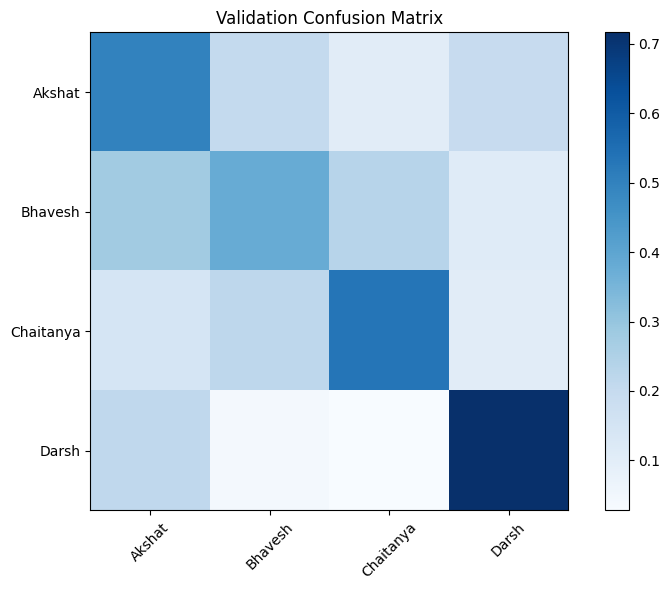


📊 Test (Unknown Data) Evaluation
Accuracy: 0.2556794712928542
F1 Macro: 0.2528069726018928
Classification Report:
               precision    recall  f1-score   support

      Akshat       0.26      0.28      0.27       605
     Bhavesh       0.23      0.21      0.22       563
   Chaitanya       0.25      0.22      0.23       600
       Darsh       0.28      0.31      0.29       653

    accuracy                           0.26      2421
   macro avg       0.25      0.25      0.25      2421
weighted avg       0.25      0.26      0.25      2421



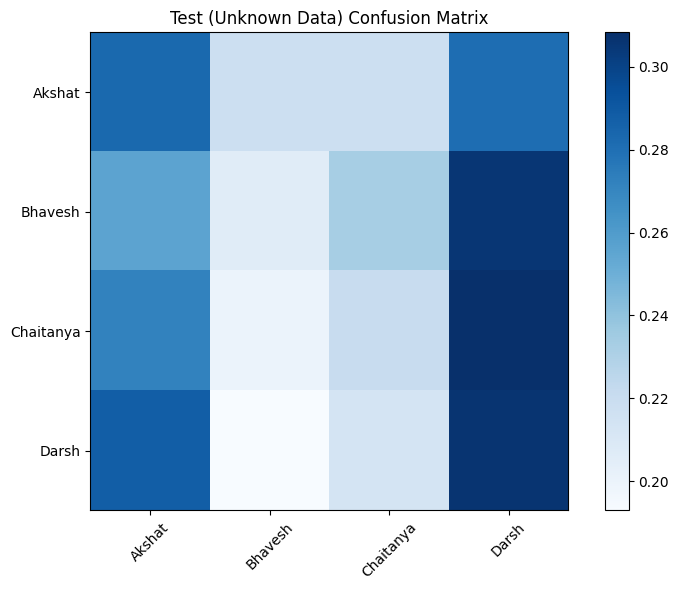


✅ Model saved as 'best_tuned_fusion_model.joblib'


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import joblib

# ---------- Step 1: Load and Prepare Data ----------
# Load datasets
train_df = pd.read_csv("train_data_final_processed.csv")
test_df = pd.read_csv("test_data_final_processed.csv")
submission_df = pd.read_csv("sample_submission.csv")

# Encode target column using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df["Segmentation"])
X = train_df.drop(columns=["Segmentation"])

# Encode submission target to match model output
submission_df["Segmentation"] = label_encoder.transform(submission_df["Segmentation"])
submission_df.to_csv("sample_submission_encoded.csv", index=False)
print("✅ Encoded 'sample_submission.csv' saved as 'sample_submission_encoded.csv'")

# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# ---------- Step 2: Tune Base Models ----------
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='hist', random_state=42)
xgb_params = {
    'n_estimators': randint(150, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=20, scoring='f1_macro', n_jobs=-1, cv=3, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4)
}
lgbm_search = RandomizedSearchCV(lgbm, lgbm_params, n_iter=20, scoring='f1_macro', n_jobs=-1, cv=3, random_state=42)
lgbm_search.fit(X_train, y_train)
best_lgbm = lgbm_search.best_estimator_

# CatBoost (not tuned here for speed)
best_cat = CatBoostClassifier(verbose=0, random_state=42)

# Random Forest
best_rf = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', n_jobs=-1, random_state=42)

# Extra Trees
best_et = ExtraTreesClassifier(n_estimators=300, max_depth=15, n_jobs=-1, random_state=42)

# ---------- Step 3: Stacked Ensemble ----------
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('cat', best_cat),
        ('rf', best_rf),
        ('et', best_et)
    ],
    final_estimator=LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        multi_class='multinomial',
        class_weight='balanced',
        random_state=42
    ),
    cv=5,
    n_jobs=-1
)

stacked_model.fit(X_train, y_train)

# ---------- Step 4: Evaluation ----------
def evaluate(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Macro:", f1_score(y_true, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.colorbar()
    ticks = range(len(label_encoder.classes_))
    plt.xticks(ticks, label_encoder.classes_, rotation=45)
    plt.yticks(ticks, label_encoder.classes_)
    plt.tight_layout()
    plt.show()

# Validation performance
y_val_pred = stacked_model.predict(X_val)
evaluate("Validation", y_val, y_val_pred)

# Test performance using encoded submission
X_test = test_df
y_test_true = submission_df["Segmentation"]
y_test_pred = stacked_model.predict(X_test)
evaluate("Test (Unknown Data)", y_test_true, y_test_pred)

# ---------- Step 5: Save Model ----------
joblib.dump(stacked_model, "best_tuned_fusion_model.joblib")
print("\n✅ Model saved as 'best_tuned_fusion_model.joblib'")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import optuna

# ------------------ LOAD DATA ------------------ #
train_df = pd.read_csv("train_data_final_processed.csv")
test_df = pd.read_csv("test_data_final_processed.csv")
submission_df = pd.read_csv("sample_submission.csv")

# ------------------ LABEL ENCODING ------------------ #
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Make sure encoder folder exists
os.makedirs("encoders", exist_ok=True)

for col in ['Sex', 'Bachelor', 'Graduated']:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])  # Match same encoding
    joblib.dump(le, f'encoders/{col}_encoder.joblib')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df["Segmentation"])
X = train_df.drop(columns=["Segmentation"])

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ------------------ FEATURE SELECTION ------------------ #
feat_selector = ExtraTreesClassifier(n_estimators=100, random_state=42)
feat_selector.fit(X_train, y_train)
feat_importances = pd.Series(feat_selector.feature_importances_, index=X_train.columns)
top_features = feat_importances.nlargest(30).index.tolist()

X_train = X_train[top_features]
X_val = X_val[top_features]
X_test = test_df[top_features]

# ------------------ OPTUNA TUNING FOR XGBOOST ------------------ #
def optuna_objective(trial):
    model = XGBClassifier(
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        n_estimators=trial.suggest_int('n_estimators', 100, 400),
        subsample=trial.suggest_float('subsample', 0.6, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
        use_label_encoder=False,
        eval_metric='mlogloss',
        tree_method='hist',
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return f1_score(y_val, preds, average='macro')

study = optuna.create_study(direction="maximize")
study.optimize(optuna_objective, n_trials=30)

best_xgb = XGBClassifier(
    **study.best_params,
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)
best_xgb.fit(X_train, y_train)

# ------------------ TRAIN OTHER MODELS ------------------ #
best_lgbm = LGBMClassifier(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.8, random_state=42)
best_lgbm.fit(X_train, y_train)

best_cat = CatBoostClassifier(verbose=0, random_state=42)
best_cat.fit(X_train, y_train)

best_rf = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', n_jobs=-1, random_state=42)
best_rf.fit(X_train, y_train)

best_et = ExtraTreesClassifier(n_estimators=300, max_depth=15, n_jobs=-1, random_state=42)
best_et.fit(X_train, y_train)

# ------------------ STACKED + CALIBRATED MODEL ------------------ #
meta_learner = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42
)

stacked_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('cat', best_cat),
        ('rf', best_rf),
        ('et', best_et)
    ],
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

calibrated_model = CalibratedClassifierCV(stacked_model, method='sigmoid', cv=3)
calibrated_model.fit(X_train, y_train)

# ------------------ EVALUATION ------------------ #
def evaluate(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Macro:", f1_score(y_true, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

# Validation Set
val_preds = calibrated_model.predict(X_val)
evaluate("Validation", y_val, val_preds)

# Test Set
submission_df["Segmentation"] = label_encoder.transform(submission_df["Segmentation"])
y_test_true = submission_df["Segmentation"]
y_test_pred = calibrated_model.predict(X_test)
evaluate("Test", y_test_true, y_test_pred)

# Save Model
joblib.dump(calibrated_model, "accurate_fusion_model.joblib")
print("✅ Model saved as 'accurate_fusion_model.joblib'")


Train columns: ['Age', 'Work Experience', 'Family Expenses', 'Family  Size', 'Sex_Male', 'Bachelor_No', 'Bachelor_Yes', 'Graduated_No', 'Graduated_Yes', 'Career_Doctor', 'Career_Fashion Designer', 'Career_HR', 'Career_Housewife', 'Career_Lawyer', 'Career_Male', 'Career_Scientist', 'Career_Singer', 'Variable_Dog_2', 'Variable_Dog_3', 'Variable_Dog_4', 'Variable_Dog_5', 'Variable_Dog_6', 'Variable_Dog_7', 'Variable_Male', 'Segmentation']


KeyError: 'Sex'